In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
#Loading the Dataset
dataset = pd.read_csv("/content/loan_new.csv")


In [55]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
dataset.shape

(614, 13)

In [57]:
#defining all the columns in the dataset
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
#checking for number of null values in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
#arranging the columns in the descending order of there number of null values
dataset.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
#total number of null values in the entire dataset
dataset.isnull().sum().sum()

149

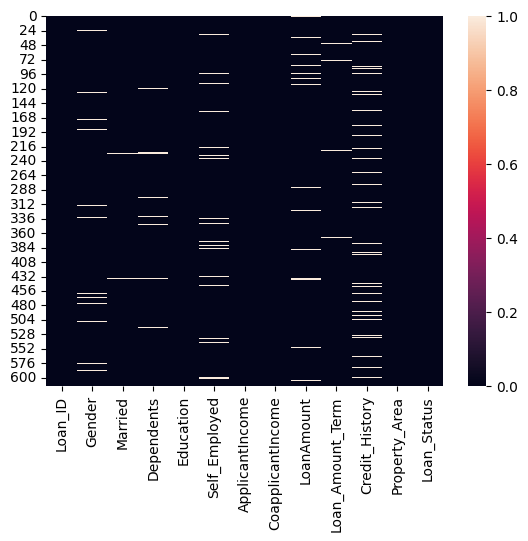

In [61]:
#visualizing the null values using heatmap
sns.heatmap(dataset.isnull())
plt.show()

In [62]:
#describing datatypes, Non-Null Count values of each columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
dataset['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [64]:
#summary of all the columns having object datatype with the null values in them in the Ascending order
dataset.select_dtypes(include = 'object').isnull().sum().sort_values(ascending = False)

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_ID           0
Education         0
Property_Area     0
Loan_Status       0
dtype: int64

In [65]:
#Filling all the null values in the categorical columns with their mode values of that particular column
for i in dataset.select_dtypes(include = 'object').columns:
  dataset[i].fillna(dataset[i].mode()[0], inplace = True)

In [66]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
##Filling all the null values in the numerical columns with their mode values of that particular column
for i in dataset.select_dtypes(include = 'float64').columns:
   dataset[i].fillna(dataset[i].mean(), inplace = True)


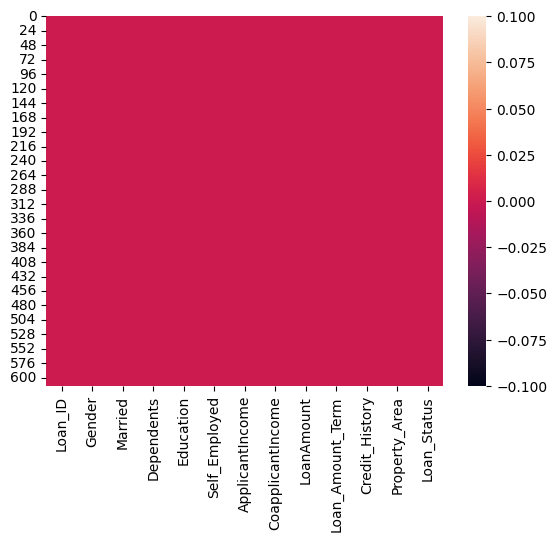

In [92]:
#visualizing the null values using heatmap
sns.heatmap(dataset.isnull())
plt.show()

In [68]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
#performing maping to replace the male and female date(categorical data) into 1 and 0 (numerical data) respectively in Gender column
dataset['Gender'] = dataset['Gender'].map({'Male' : 1, 'Female' : 0})

In [70]:
dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,1,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,1,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,1,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,1,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


<ipython-input-77-c84249bb2efa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')


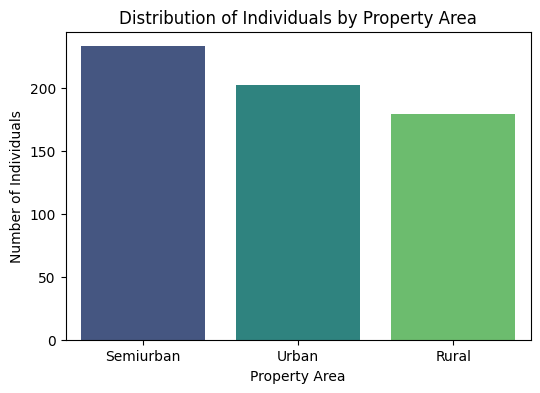

In [77]:
#Create a bar plot to count Distribution of Individuals by location
area_counts = dataset['Property_Area'].value_counts()

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')
plt.title('Distribution of Individuals by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Individuals')
plt.show()

<Figure size 800x600 with 0 Axes>

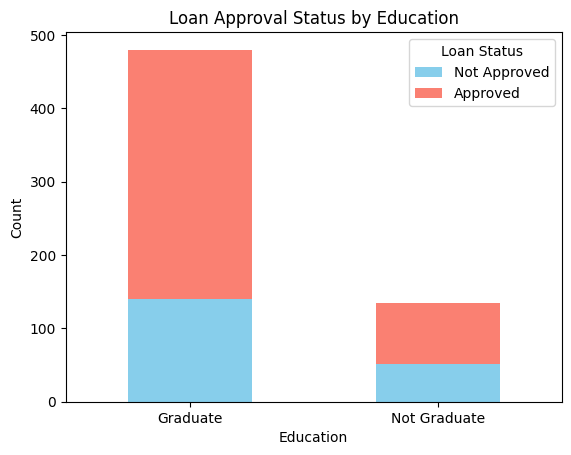

In [73]:
#pivot table to count loan approvals by education status
education_loan_counts = dataset.pivot_table(index='Education', columns='Loan_Status', aggfunc='size', fill_value=0)

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
education_loan_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Loan Approval Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

<Figure size 600x400 with 0 Axes>

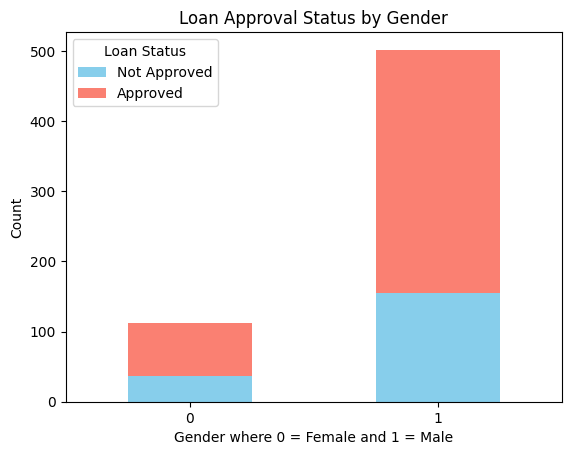

In [78]:
#pivot table to count loan approvals by Gender
education_loan_counts = dataset.pivot_table(index='Gender', columns='Loan_Status', aggfunc='size', fill_value=0)

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
education_loan_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender where 0 = Female and 1 = Male')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

<Figure size 600x400 with 0 Axes>

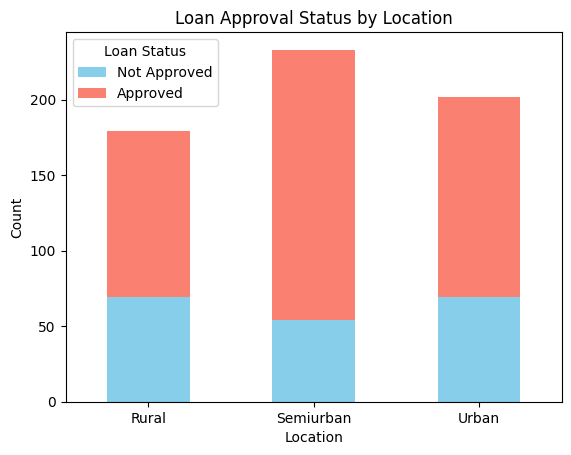

In [91]:
#pivot table to count loan approvals by education status
education_loan_counts = dataset.pivot_table(index='Property_Area', columns='Loan_Status', aggfunc='size', fill_value=0)

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
education_loan_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Loan Approval Status by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

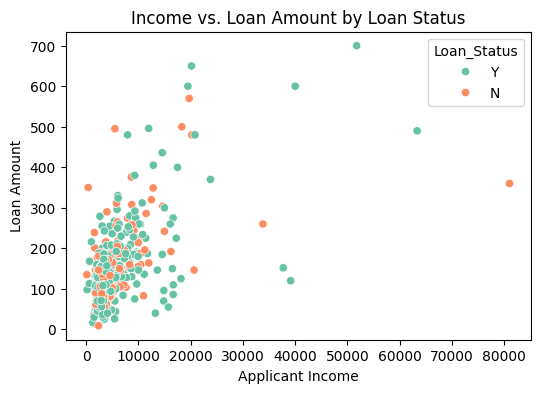

In [81]:
#Scatter plot: Income vs. Loan Amount by Loan Status
plt.figure(figsize=(6, 4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=dataset, palette='Set2')
plt.title('Income vs. Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

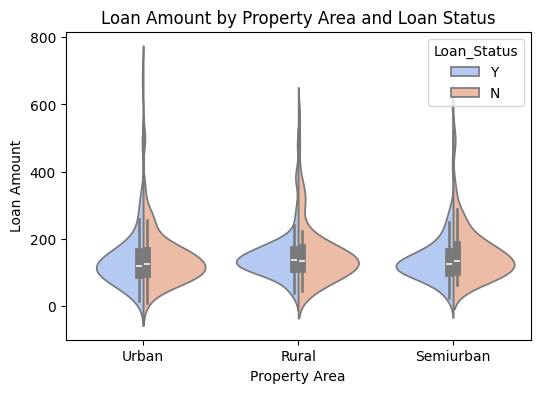

In [83]:
#Violin plots: Loan Amount by Property Area and Loan Status
plt.figure(figsize=(6, 4))
sns.violinplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=dataset, split=True, palette='coolwarm')
plt.title('Loan Amount by Property Area and Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-85-205740d7f01c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='ApplicantIncome', y='LoanAmount', data=approved_loans_sorted, ci=None)


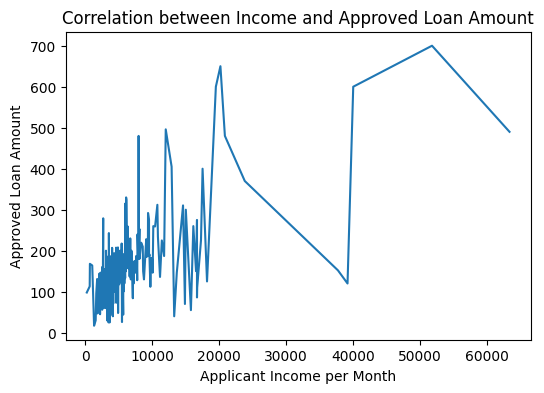

In [85]:
# Filter data for approved loans (Loan_Status == 'Y')
approved_loans = dataset[dataset['Loan_Status'] == 'Y']

# Sort the data by ApplicantIncome for plotting
approved_loans_sorted = approved_loans.sort_values(by='ApplicantIncome')

# line plot to show the correlation between ApplicantIncome and LoanAmount
plt.figure(figsize=(6, 4))
sns.lineplot(x='ApplicantIncome', y='LoanAmount', data=approved_loans_sorted, ci=None)
plt.title('Correlation between Income and Approved Loan Amount')
plt.xlabel('Applicant Income per Month')
plt.ylabel('Approved Loan Amount')
plt.show()

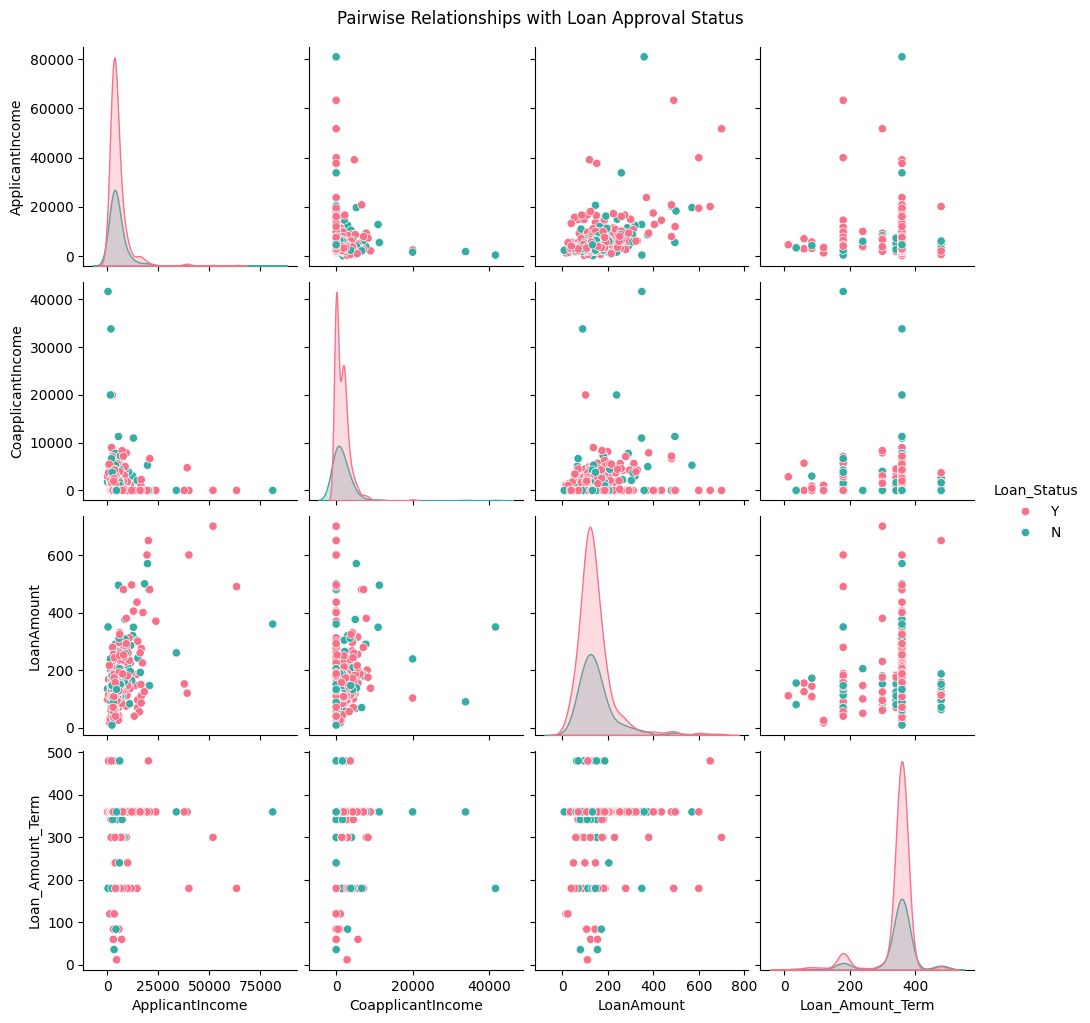

In [86]:
#pair plot : Pairwise Relationships with Loan Approval Status
sns.pairplot(dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']], hue='Loan_Status', palette='husl')
plt.suptitle('Pairwise Relationships with Loan Approval Status', y=1.02)
plt.show()

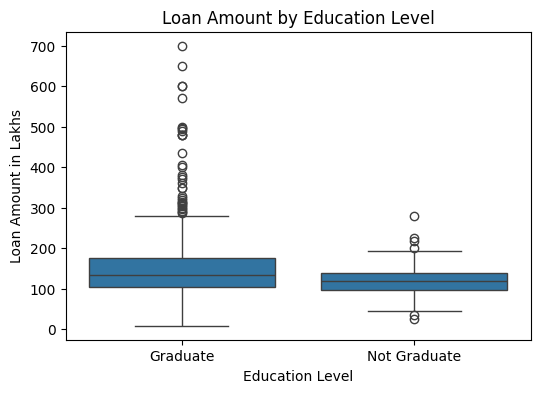

In [87]:
#Box plot of LoanAmount by Education
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education', y='LoanAmount', data=dataset)
plt.title('Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount in Lakhs')
plt.show()